### Handwritten Number Recognition using Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Import the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# Normalize the images to the range of [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
# Build a CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8839 - loss: 0.3613 - val_accuracy: 0.9853 - val_loss: 0.0438
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9852 - loss: 0.0465 - val_accuracy: 0.9868 - val_loss: 0.0471
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9892 - loss: 0.0349 - val_accuracy: 0.9896 - val_loss: 0.0317
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9911 - val_loss: 0.0280


4 epochs is enough to reach 99.14% accuracy on the test set. The model overfits after 4 epochs, indicated by the decrease of accuracy.

(For reference, 5 epochs model only reaches 99.00% accuracy. It may sound negligible but "I like my models accurate bruh")

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9914 - loss: 0.0293
Test accuracy: 0.9914000034332275


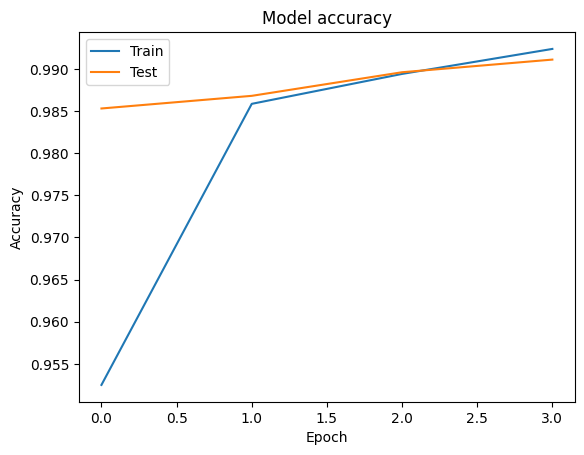

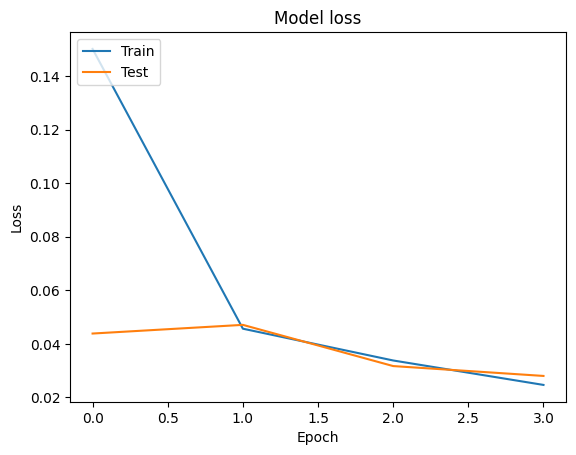

In [6]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()